<a href="https://colab.research.google.com/github/akshziitj/qc-labs/blob/main/src/01_gates/01_qml_measurement_end.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 35.7 MB/s eta 0:00:00


In [2]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Set up the quantum device
dev = qml.device("default.qubit", wires=1, shots=102400)

In [4]:
# Define the quantum circuit to get the statevector
@qml.qnode(dev)
def hadamard_measure():
    qml.Hadamard(wires=0)
    return qml.sample(qml.PauliZ(0))  # computational basis measurement

In [5]:
# Run the circuit
samples = hadamard_measure()

In [6]:
# Convert samples (±1 from PauliZ) into bits (0/1)
bits = (1 - samples) // 2

In [7]:
# Count results
unique, counts = np.unique(bits, return_counts=True)
result_counts = dict(zip(unique.astype(str), counts))
print(result_counts)

{np.str_('0.0'): np.int64(51208), np.str_('1.0'): np.int64(51192)}


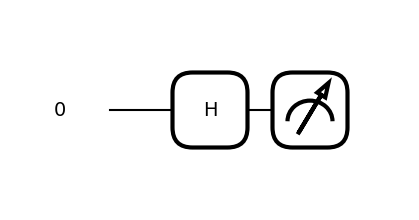

In [8]:
# Draw the circuit
qml.draw_mpl(hadamard_measure)()
plt.show()

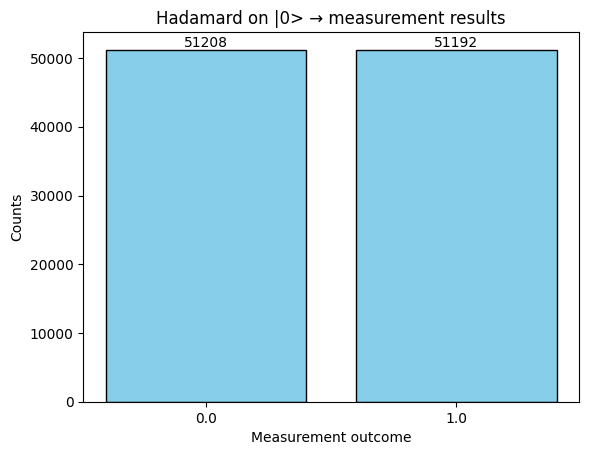

In [9]:
# --- Plot histogram ---
fig, ax = plt.subplots()
bars = ax.bar(result_counts.keys(), result_counts.values(),
              color="skyblue", edgecolor="black")
# Add text labels on top of bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height,
            f"{height}", ha="center", va="bottom", fontsize=10)

ax.set_xlabel("Measurement outcome")
ax.set_ylabel("Counts")
ax.set_title("Hadamard on |0> → measurement results")
plt.show()